<a href="https://colab.research.google.com/github/Ak-ai-coder/ml-2/blob/main/mlv3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

bank = '/content/drive/MyDrive/bank-full.csv'
df = pd.read_csv((bank), delimiter=';', quotechar='"')

Mounted at /content/drive


In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
num_rows = df.shape[0]
print(num_rows)
df.info()

45211
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
for col in df.select_dtypes(include=['object']).columns:
  print(col)
  print (df[col].unique())

job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital
['married' 'single' 'divorced']
education
['tertiary' 'secondary' 'unknown' 'primary']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'failure' 'other' 'success']
y
['no' 'yes']


# Exploratory Data Analysis

*   Find Unwanted columns
*   Find Missing Values
*   Find Features with one values
*  Explore categorical features
* Find categorical feature distribution
* Relationship between categorical features and label
* Explore numerical features
* Find discrete numerical features
* Relation between discrete numerical features and label
* Find continous numerical features
* Distribution of continous numerical features
* Relation between continous numerical features and labels
* Find outliers in numerical features
*  Explore the correlation between numerical features
* Find pair plot
* check the dataset is balanced or not based on target values



In [ ]:
#find missing values
features_na = [features for features in df.columns if df [features].isnull().sum()>0]
for feature in features_na:
  print(feature, np.round(df[feature].isnull().mean(), 4), ' % missing values')
else:
  print ('no missing values')

no missing values


In [ ]:
#features with one value
for column in df.columns:
  print(column, df[column].nunique())

age 77
job 12
marital 3
education 4
default 2
balance 7168
housing 2
loan 2
contact 3
day 31
month 12
duration 1573
campaign 48
pdays 559
previous 41
poutcome 4
y 2


In [ ]:
categorical_features =[feature for feature in df.columns if (df[feature].dtypes=='O') and (feature not in ['deposit'])]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [ ]:
for feature in categorical_features:
  print('the feature is {} and the number of categories are {}'.format(feature,len(df[feature].unique ())))

the feature is job and the number of categories are 12
the feature is marital and the number of categories are 3
the feature is education and the number of categories are 4
the feature is default and the number of categories are 2
the feature is housing and the number of categories are 2
the feature is loan and the number of categories are 2
the feature is contact and the number of categories are 3
the feature is month and the number of categories are 12
the feature is poutcome and the number of categories are 4
the feature is y and the number of categories are 2


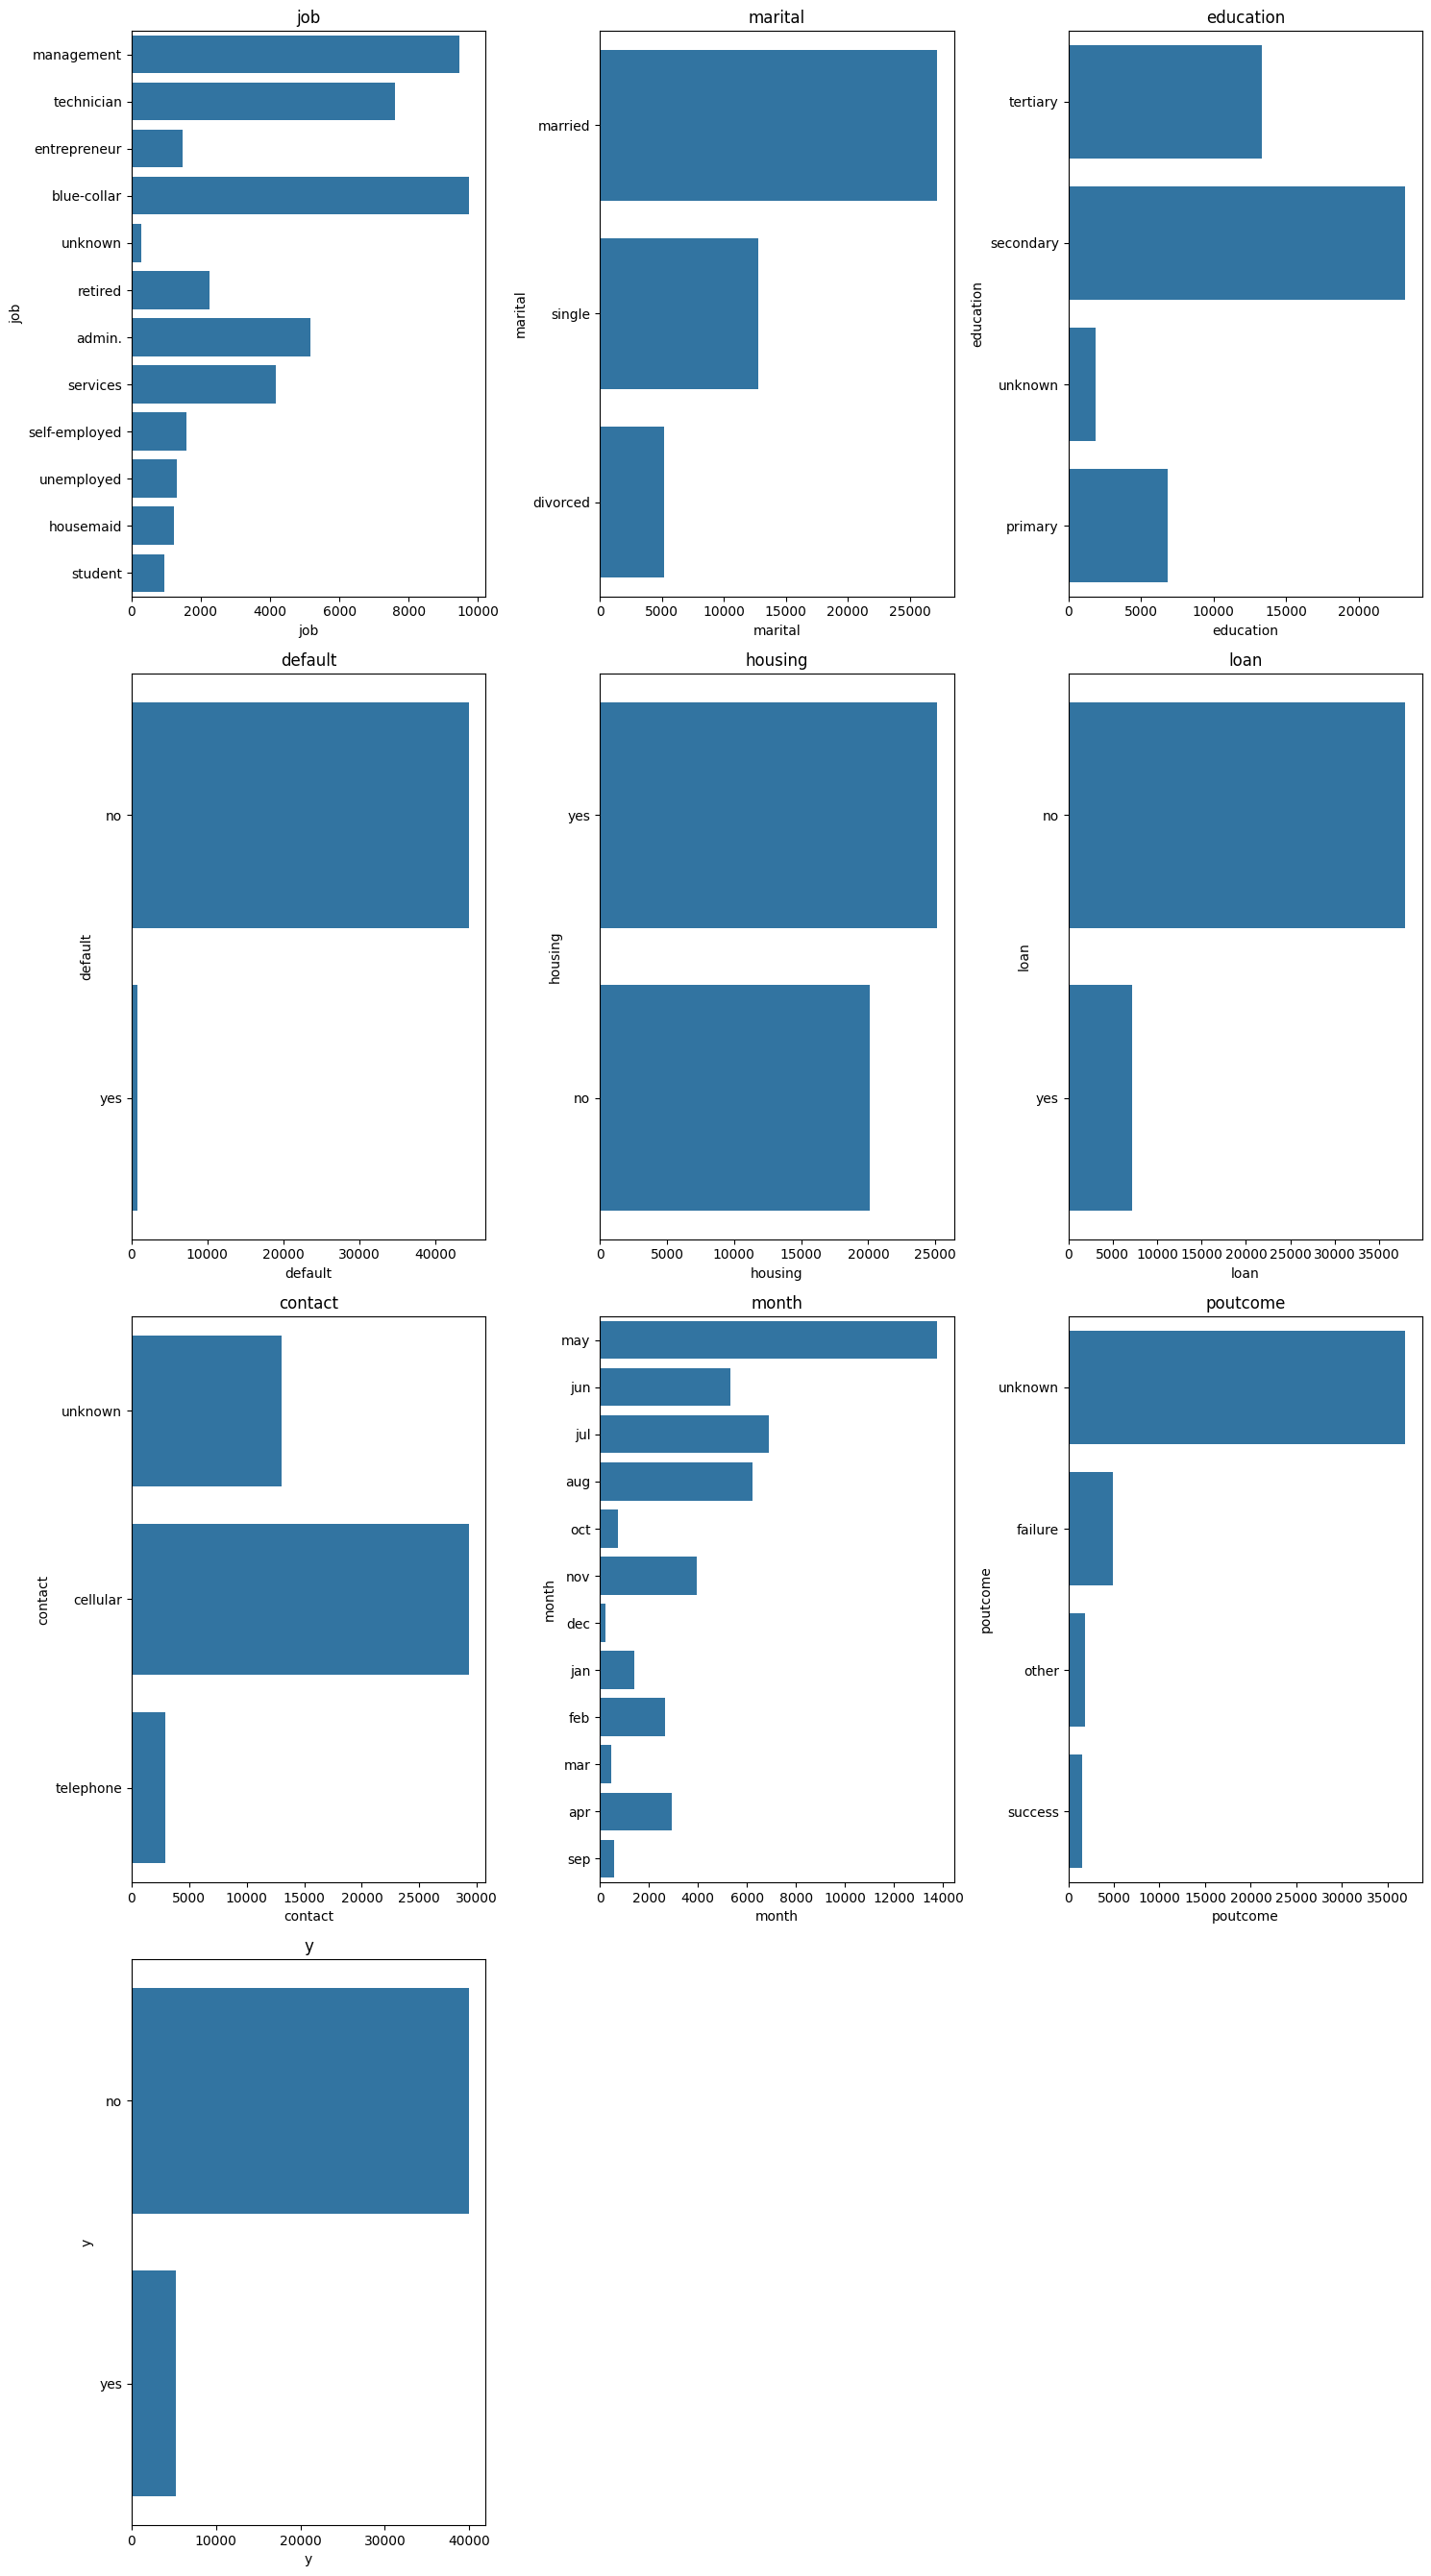

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#check count based on categorical features
plt.figure(figsize=(15,80),facecolor='w')
plotnumber=1
for categorical_feature in categorical_features:
  ax=plt.subplot(12,3,plotnumber)
  sns.countplot(y=categorical_feature,data=df)
  plt.xlabel(categorical_feature)
  plt.title(categorical_feature)
  plotnumber+=1
plt.tight_layout()
plt.show()

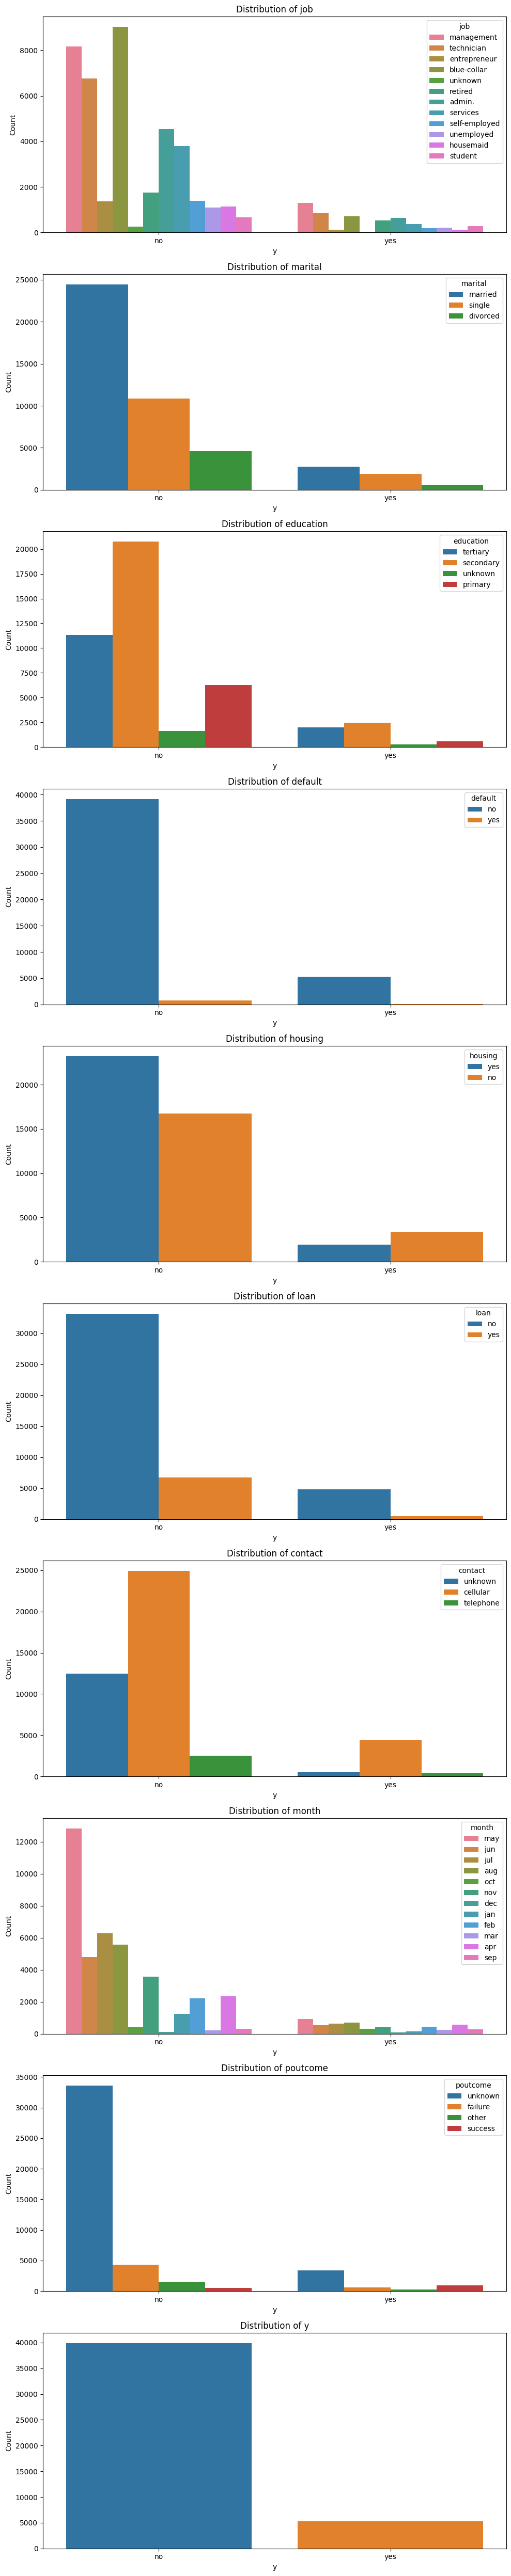

In [ ]:

n_features = len(categorical_features)
fig, axes = plt.subplots(n_features, 1, figsize=(10, 5 * n_features))

# Loop through each categorical feature
for i, categorical_feature in enumerate(categorical_features):
    if categorical_feature in df.columns:
        sns.countplot(
            x='y', hue=categorical_feature, data=df, ax=axes[i]
        )
        axes[i].set_title(f'Distribution of {categorical_feature}')
        axes[i].set_xlabel('y')
        axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
for categorical_feature in categorical_features:
  print(df.groupby(['y',categorical_feature]).size())

y    job          
no   admin.           4540
     blue-collar      9024
     entrepreneur     1364
     housemaid        1131
     management       8157
     retired          1748
     self-employed    1392
     services         3785
     student           669
     technician       6757
     unemployed       1101
     unknown           254
yes  admin.            631
     blue-collar       708
     entrepreneur      123
     housemaid         109
     management       1301
     retired           516
     self-employed     187
     services          369
     student           269
     technician        840
     unemployed        202
     unknown            34
dtype: int64
y    marital 
no   divorced     4585
     married     24459
     single      10878
yes  divorced      622
     married      2755
     single       1912
dtype: int64
y    education
no   primary       6260
     secondary    20752
     tertiary     11305
     unknown       1605
yes  primary        591
     secondary     2

In [ ]:
#list of numerical features
numerical_features=[feature for feature in df.columns if (df[feature].dtypes!='O') and (feature not in ['deposit'])]
print('numerical features are {}'.format(numerical_features))
df[numerical_features].head()

numerical features are ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [ ]:
discrete_features=[feature for feature in numerical_features if len(df[feature].unique())<25]
print('discrete features are {}'.format(discrete_features))

discrete features are []


In [ ]:
continous_features=[feature for feature in numerical_features if feature not in discrete_features+['y']]
print('continous features are {}'.format(continous_features))

continous features are ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


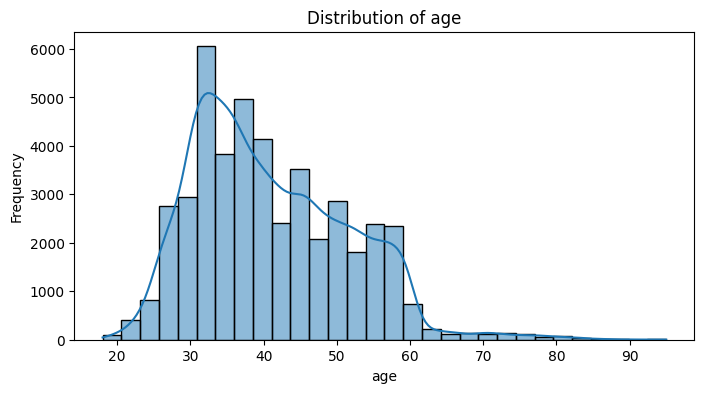

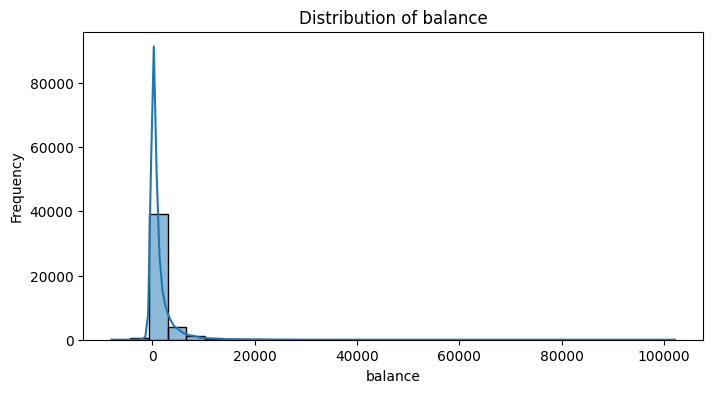

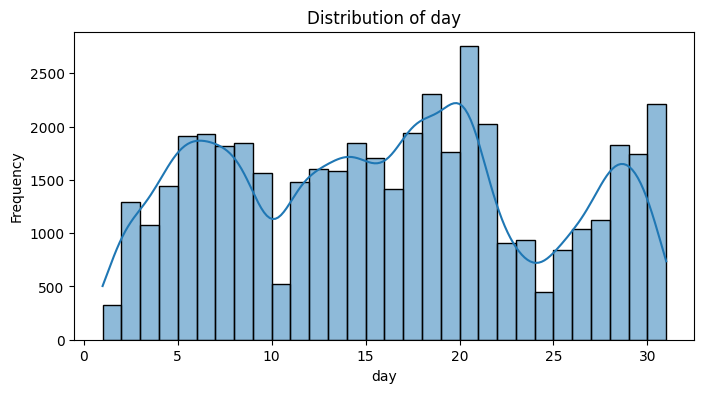

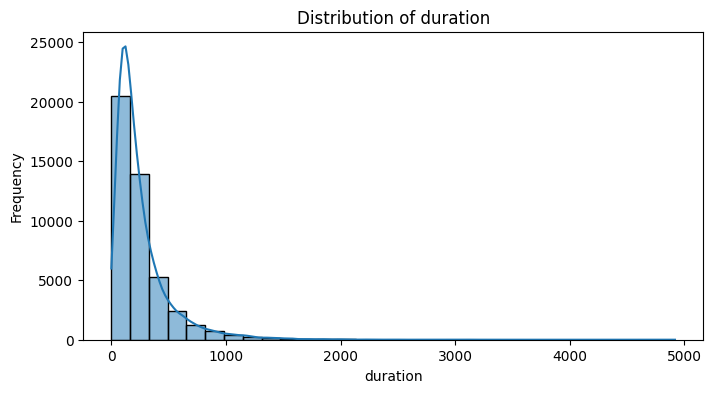

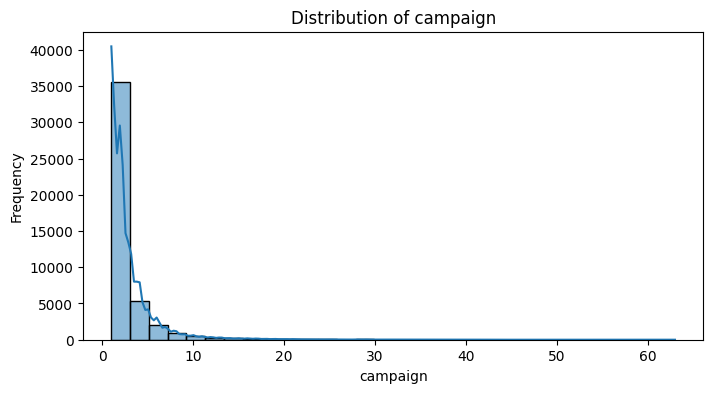

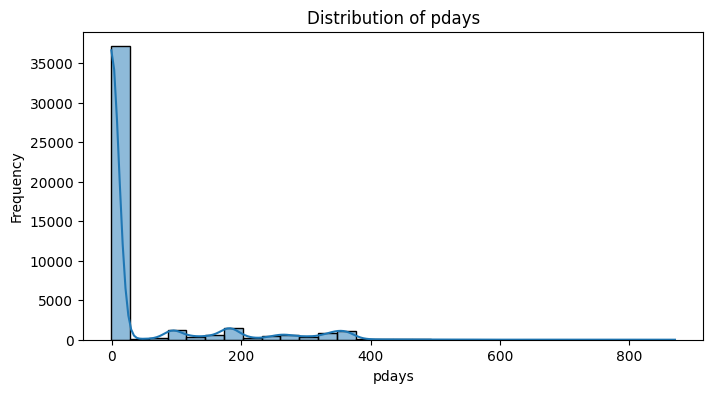

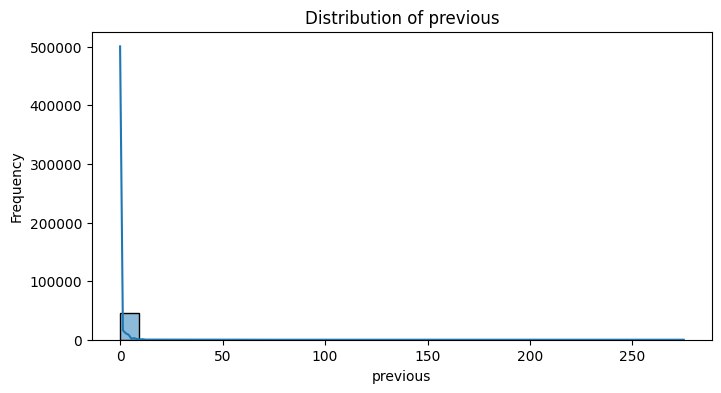

In [ ]:
# Identify numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Plot the distribution of each numerical feature
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

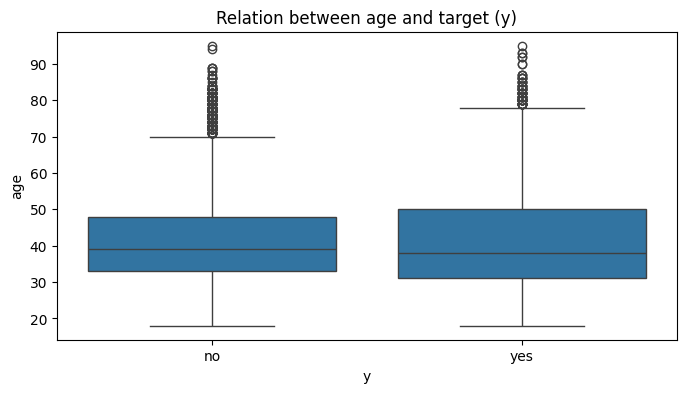

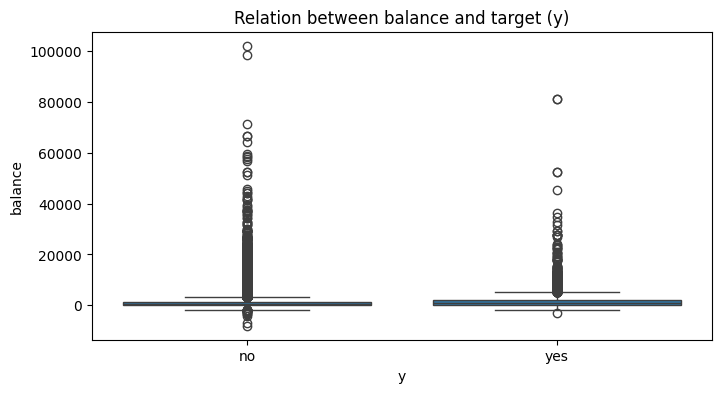

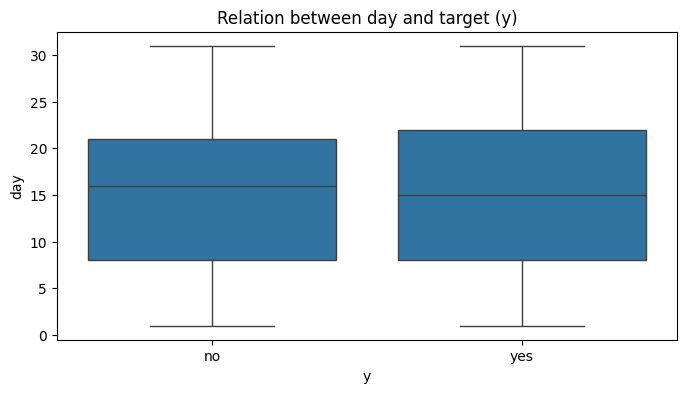

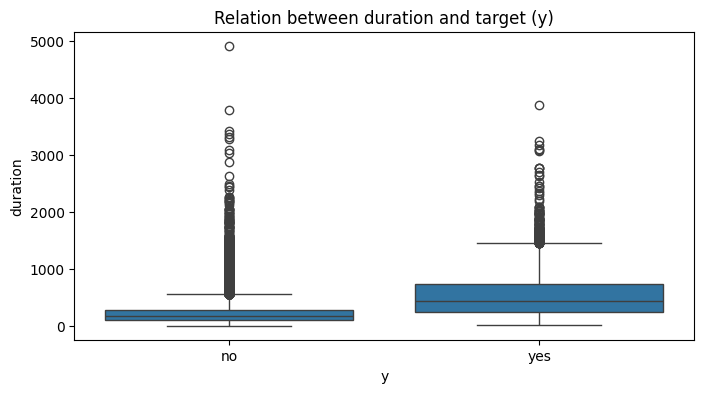

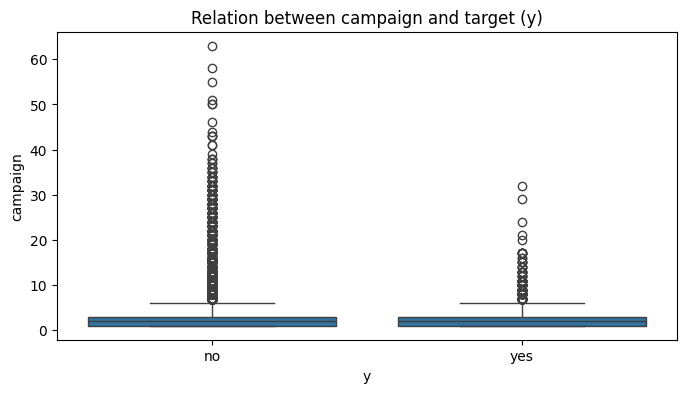

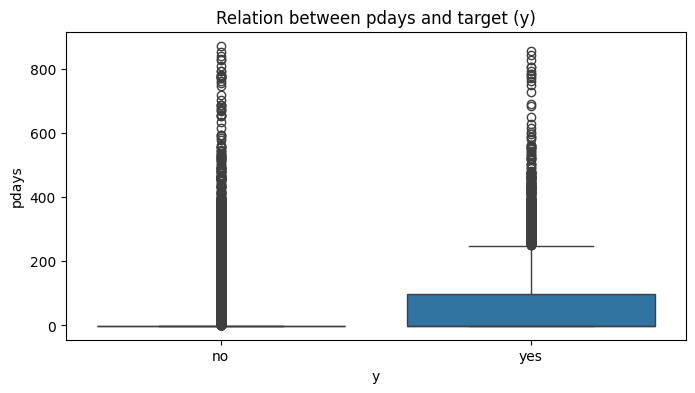

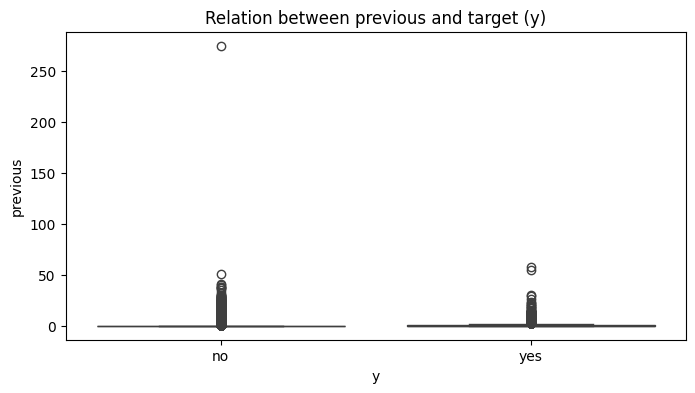

In [ ]:
# Plot boxplots to see the relationship
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='y', y=feature, data=df)
    plt.title(f'Relation between {feature} and target (y)')
    plt.xlabel('y')
    plt.ylabel(feature)
    plt.show()

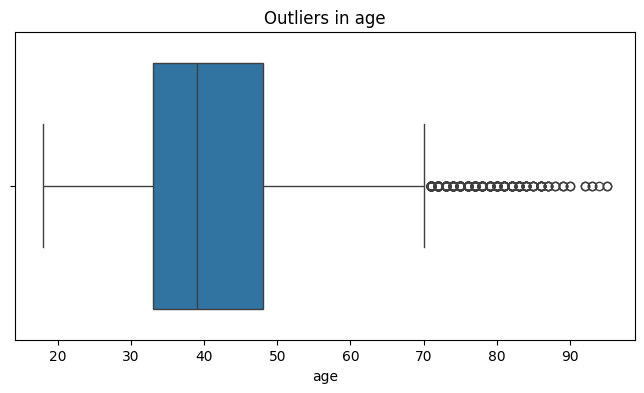

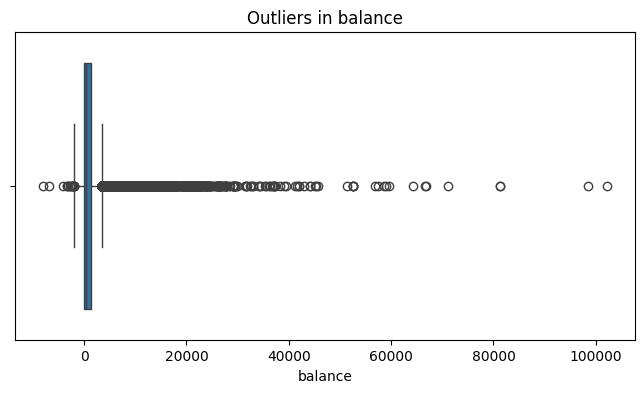

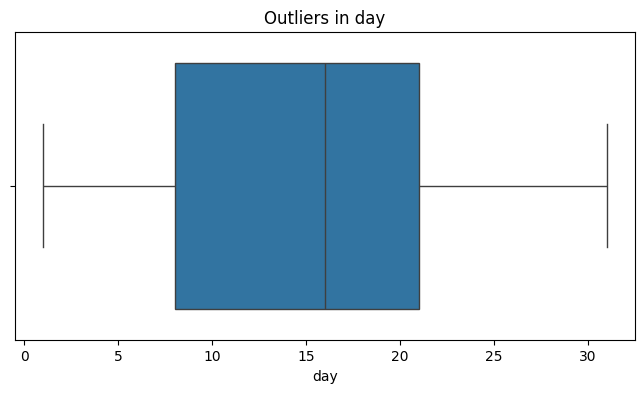

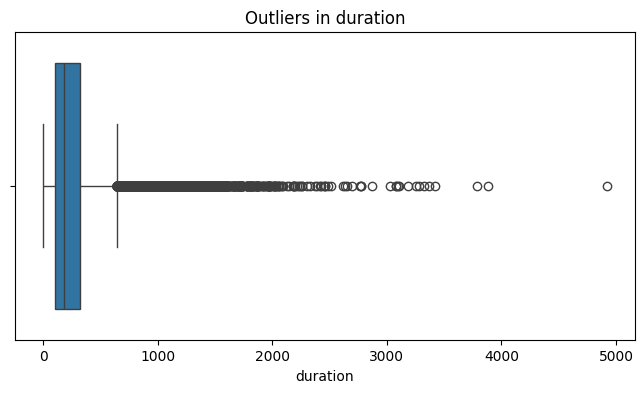

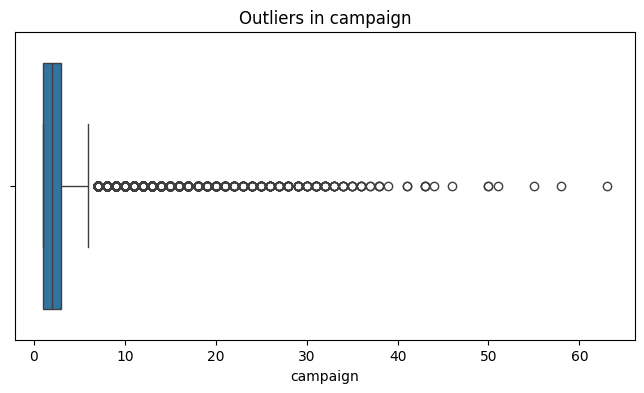

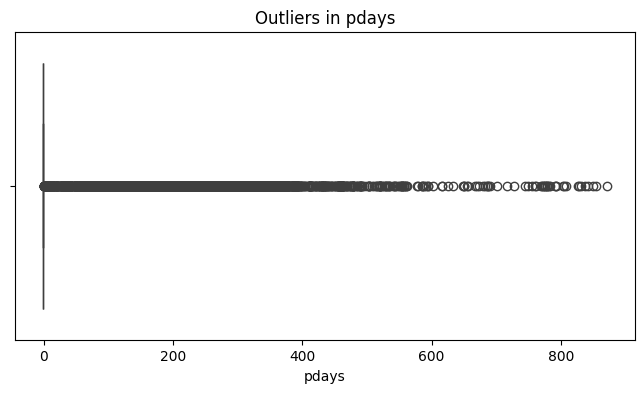

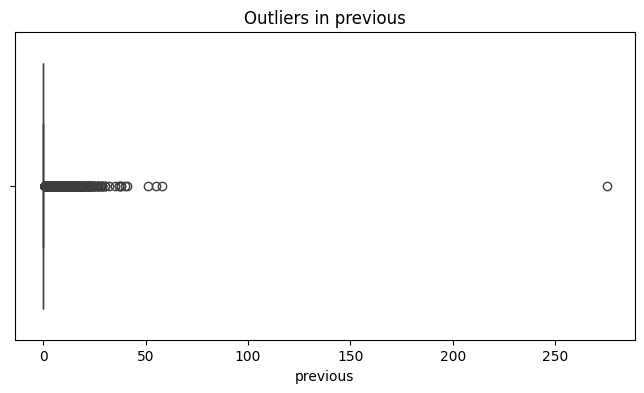

In [ ]:
# Boxplots to identify outliers
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[feature])
    plt.title(f'Outliers in {feature}')
    plt.xlabel(feature)
    plt.show()

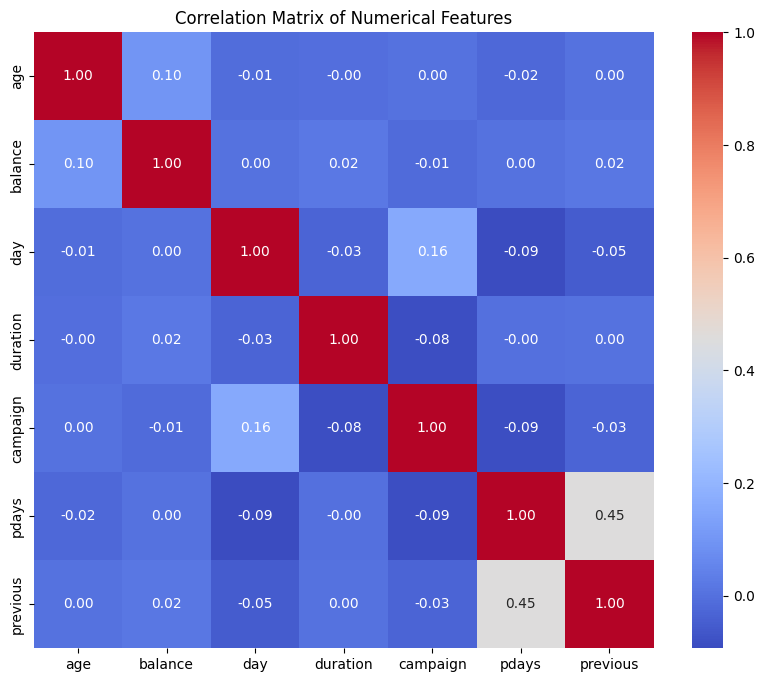

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Class Distribution of Target Variable (y):
y
no     39922
yes     5289
Name: count, dtype: int64


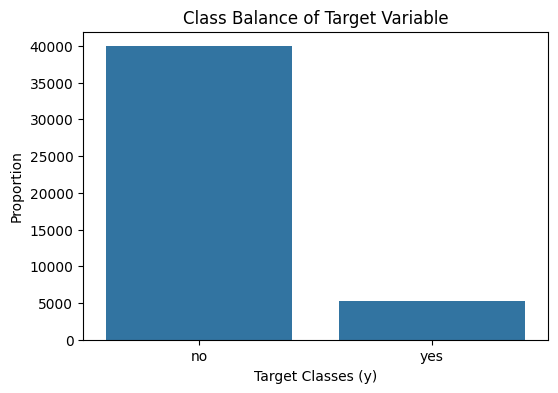

In [ ]:
# Check the class distribution of target variable
class_distribution = df['y'].value_counts(normalize=False)
print("Class Distribution of Target Variable (y):")
print(class_distribution)

# Bar plot of class distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.title('Class Balance of Target Variable')
plt.xlabel('Target Classes (y)')
plt.ylabel('Proportion')
plt.show()

# Feature Engineering




* Drop Unwanted features
* Handle missing values
* Handle feature scaling
* Remove outliers

**As per the data analysis we have founf:**

* no missing values
* no feature with one value
* 9 categorical features
* default features dont play an important role
* some outliers were found(age,balance,day,duration and campaign)







In [2]:
df2=df.copy()
df2.head
df2.shape

(45211, 17)

In [ ]:
#drop unwanted features
df2.groupby(['y','default']).size()
df2.drop(['default'],axis=1,inplace=True)

In [ ]:
df2.groupby(['y','previous']).size()
df2.drop(['previous'],axis=1,inplace=True)
df2['default'] = df['default']

In [ ]:
df2.drop(['duration'],axis=1,inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   balance    45211 non-null  int64 
 5   housing    45211 non-null  object
 6   loan       45211 non-null  object
 7   contact    45211 non-null  object
 8   day        45211 non-null  int64 
 9   month      45211 non-null  object
 10  campaign   45211 non-null  int64 
 11  pdays      45211 non-null  int64 
 12  poutcome   45211 non-null  object
 13  y          45211 non-null  object
 14  default    45211 non-null  object
dtypes: int64(5), object(10)
memory usage: 5.2+ MB


In [ ]:
df2.drop(['pdays'],axis=1,inplace=True)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   balance    45211 non-null  int64 
 5   housing    45211 non-null  object
 6   loan       45211 non-null  object
 7   contact    45211 non-null  object
 8   day        45211 non-null  int64 
 9   month      45211 non-null  object
 10  campaign   45211 non-null  int64 
 11  poutcome   45211 non-null  object
 12  y          45211 non-null  object
 13  default    45211 non-null  object
dtypes: int64(4), object(10)
memory usage: 4.8+ MB


In [ ]:
df2.drop(['default'],axis=1,inplace=True)

In [ ]:
#remove outliers in age
df2.groupby(['y','age'],sort=True)['age'].count()

y    age
no   18      5
     19     24
     20     35
     21     57
     22     89
            ..
yes  87      3
     90      2
     92      2
     93      2
     95      1
Name: age, Length: 148, dtype: int64

In [ ]:
#remove outliers in campaign
df2.groupby(['y','campaign'],sort=True)['campaign'].count()

y    campaign
no   1           14983
     2           11104
     3            4903
     4            3205
     5            1625
                 ...  
yes  20              1
     21              1
     24              1
     29              1
     32              1
Name: campaign, Length: 70, dtype: int64

In [ ]:
#remove outliers in balance
df2.groupby(['y','balance'],sort=True)['balance'].count()

y    balance
no   -8019      1
     -6847      1
     -4057      1
     -3372      1
     -3313      1
               ..
yes   34646     1
      36252     1
      45248     1
      52587     2
      81204     2
Name: balance, Length: 9258, dtype: int64

In [3]:
categorical_columns = df2.select_dtypes(include=['object']).columns

# Apply One-Hot Encoding to all categorical columns
df2_encoded = pd.get_dummies(df2, columns=categorical_columns, drop_first=False)

# Convert boolean columns (True/False) to integers (0/1)
df2_encoded = df2_encoded.astype(int)
print("Categorical columns one-hot encoded and converted to 0/1!")
print(df2_encoded.head())

Categorical columns one-hot encoded and converted to 0/1!
   age  balance  day  duration  campaign  pdays  previous  job_admin.  \
0   58     2143    5       261         1     -1         0           0   
1   44       29    5       151         1     -1         0           0   
2   33        2    5        76         1     -1         0           0   
3   47     1506    5        92         1     -1         0           0   
4   33        1    5       198         1     -1         0           0   

   job_blue-collar  job_entrepreneur  ...  month_may  month_nov  month_oct  \
0                0                 0  ...          1          0          0   
1                0                 0  ...          1          0          0   
2                0                 1  ...          1          0          0   
3                1                 0  ...          1          0          0   
4                0                 0  ...          1          0          0   

   month_sep  poutcome_failure  po

In [4]:
# Combine one-hot encoded target columns into a single target column
df2_encoded['y'] = df2_encoded['y_yes']
df2_encoded = df2_encoded.drop(['y_no', 'y_yes'], axis=1)
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df2_encoded.drop('y', axis=1)  # All columns except 'y'
y = df2_encoded['y']  # The target column

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the splits
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (36168, 51)
Shape of X_test: (9043, 51)
Shape of y_train: (36168,)
Shape of y_test: (9043,)


In [ ]:
print(df2_encoded.columns)

Index(['age', 'balance', 'day', 'campaign', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'housing_no', 'housing_yes',
       'loan_no', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'contact_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'default_no',
       'default_yes', 'y'],
      dtype='object')


# Random forest

Random Forest Classifier Performance:
Accuracy: 0.9019130819418335

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7952
           1       0.65      0.40      0.50      1091

    accuracy                           0.90      9043
   macro avg       0.79      0.69      0.72      9043
weighted avg       0.89      0.90      0.89      9043


Confusion Matrix:
[[7719  233]
 [ 654  437]]


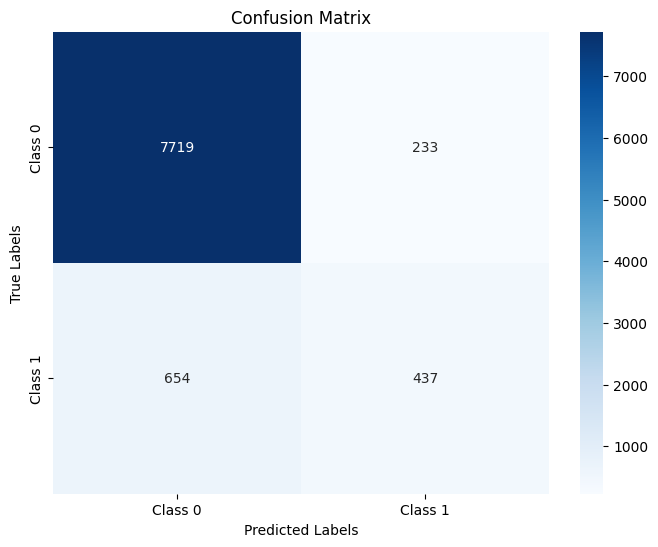

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define the number of features to consider for the root node
n_features_root_node = 15

# Create and train the Random Forest Classifier
rf_model = RandomForestClassifier(
    max_features=n_features_root_node,
    class_weight='balanced',
    random_state=42
)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Print the confusion matrix
print("\nConfusion Matrix:")
print(cm)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Neural Network

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

# Scale the features for better performance with Neural Networks
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the Neural Network model
nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Use 'sigmoid' for binary classification
])

# Compile the model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = nn_model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy = nn_model.evaluate(X_test_scaled, y_test)
print(f"\nNeural Network Test Accuracy: {test_accuracy}")

# Make predictions
y_pred_nn = (nn_model.predict(X_test_scaled) > 0.5).astype(int)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nn))

# Save the model after it has been trained
nn_model.save('neural network.keras')

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


905/905 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8936 - loss: 0.2742 - val_accuracy: 0.9074 - val_loss: 0.2120
Epoch 2/20
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9075 - loss: 0.2077 - val_accuracy: 0.9072 - val_loss: 0.2040
Epoch 3/20
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9103 - loss: 0.1951 - val_accuracy: 0.9060 - val_loss: 0.2040
Epoch 4/20
905/905 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9160 - loss: 0.1888 - val_accuracy: 0.9056 - val_loss: 0.2031
Epoch 5/20
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9169 - loss: 0.1819 - val_accuracy: 0.9027 - val_loss: 0.2062
Epoch 6/20
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9176 - loss: 0.1799 - val_accuracy: 0.9019 - val_loss: 0.2092
Epoch 7/20
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9198 - loss: 0.1771 - val_accuracy: 0.8995 - val_loss: 0.2110
Epoch 8/20
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9231 - loss: 0.1713 - val_accuracy: 0.9030 - val_

# Random forest with pre prunning

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from collections import Counter

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Verify the class distribution after SMOTE
print("Class Distribution After SMOTE:", Counter(y_resampled))

# Hyperparameter grid
n_estimators_list = [25, 50, 75, 100, 125, 150]
max_depth_list = [5, 10, 15]  # Maximum depth of the trees
min_samples_split_list = [2, 5]  # Minimum samples to split a node
min_samples_leaf_list = [1, 2]  # Minimum samples at a leaf node
max_features_list = [3, 5, 7]  # Number of features to consider at each split

best_params = {}
best_accuracy = 0

# Iterate over all combinations of parameters
for n in n_estimators_list:
    for depth in max_depth_list:
        for min_split in min_samples_split_list:
            for min_leaf in min_samples_leaf_list:
                for max_features in max_features_list:
                    # Train the Random Forest model with specific parameters
                    rf_model = RandomForestClassifier(
                        n_estimators=n,
                        max_depth=depth,
                        min_samples_split=min_split,
                        min_samples_leaf=min_leaf,
                        max_features=max_features,  # Number of features at each split
                        class_weight='balanced',   # Handle class imbalance
                        random_state=42
                    )
                    rf_model.fit(X_resampled, y_resampled)  # Use SMOTE-resampled data

                    # Evaluate the model
                    y_pred_rf = rf_model.predict(X_test)
                    accuracy = accuracy_score(y_test, y_pred_rf)
                    print(f"n_estimators={n}, max_depth={depth}, min_samples_split={min_split}, "
                          f"min_samples_leaf={min_leaf}, max_features={max_features}, Accuracy: {accuracy}")

                    # Update the best model if current accuracy is better
                    if accuracy > best_accuracy:
                        best_accuracy = accuracy
                        best_params = {
                            'n_estimators': n,
                            'max_depth': depth,
                            'min_samples_split': min_split,
                            'min_samples_leaf': min_leaf,
                            'max_features': max_features
                        }

# Print the best parameters and accuracy
print(f"\nBest Parameters: {best_params}")
print(f"Best Accuracy: {best_accuracy}")

# Train the final model with the best parameters
rf_model = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],  # Use the best max_features
    class_weight='balanced',  # Handle class imbalance
    random_state=42
)
rf_model.fit(X_resampled, y_resampled)  # Use SMOTE-resampled data

# Evaluate the final model
y_pred_rf = rf_model.predict(X_test)
print("\nRandom Forest Classifier Performance (After Tuning with SMOTE and Custom Parameters):")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Class Distribution After SMOTE: Counter({0: 31970, 1: 31970})
n_estimators=25, max_depth=5, min_samples_split=2, min_samples_leaf=1, max_features=3, Accuracy: 0.8533672453831693
n_estimators=25, max_depth=5, min_samples_split=2, min_samples_leaf=1, max_features=5, Accuracy: 0.8597810461130156
n_estimators=25, max_depth=5, min_samples_split=2, min_samples_leaf=1, max_features=7, Accuracy: 0.8493862656198164
n_estimators=25, max_depth=5, min_samples_split=2, min_samples_leaf=2, max_features=3, Accuracy: 0.8521508348999226
n_estimators=25, max_depth=5, min_samples_split=2, min_samples_leaf=2, max_features=5, Accuracy: 0.8591175494857901
n_estimators=25, max_depth=5, min_samples_split=2, min_samples_leaf=2, max_features=7, Accuracy: 0.8496074311622249
n_estimators=25, max_depth=5, min_samples_split=5, min_samples_leaf=1, max_features=3, Accuracy: 0.8533672453831693
n_estimators=25, max_depth=5, min_samples_split=5, min_samples_leaf=1, max_features=5, Accuracy: 0.8594492977994028
n_estimato

# Neural Network with data balancing

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
from collections import Counter
import numpy as np

# Split the original dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the original class distribution
print("Original class distribution in training set:", Counter(y_train))
print("Original class distribution in test set:", Counter(y_test))

# Apply SMOTE only to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the class distribution after SMOTE
print("Resampled class distribution in training set:", Counter(y_train_resampled))

# Scale the features for better performance with Neural Networks
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)  # Test set is scaled based on training set statistics

# Define the Neural Network model
nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Use 'sigmoid' for binary classification
])

# Compile the model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = nn_model.fit(X_train_scaled, y_train_resampled, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the unbalanced test set
test_loss, test_accuracy = nn_model.evaluate(X_test_scaled, y_test)
print(f"\nNeural Network Test Accuracy (with SMOTE on Training Data): {test_accuracy:.4f}")

# Make predictions with the default threshold of 0.5
y_pred_prob = nn_model.predict(X_test_scaled)
y_pred_nn = (y_pred_prob > 0.5).astype(int)

# Classification Report with Default Threshold
print("\nClassification Report (Threshold=0.5):")
print(classification_report(y_test, y_pred_nn))

# Add custom threshold tuning
threshold = 0.3  # Adjust threshold for better recall
y_pred_nn_tuned = (y_pred_prob > threshold).astype(int)

# Evaluate with custom threshold
print(f"\nClassification Report (Threshold={threshold}):")
print(classification_report(y_test, y_pred_nn_tuned))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_nn_tuned)
print("\nConfusion Matrix:")
print(cm)

# Save the model after it has been trained
nn_model.save('neural_network_with_smote_on_training.keras')

Original class distribution in training set: Counter({0: 31970, 1: 4198})
Original class distribution in test set: Counter({0: 7952, 1: 1091})


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Resampled class distribution in training set: Counter({0: 31970, 1: 31970})
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1599/1599 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9009 - loss: 0.2256 - val_accuracy: 0.9953 - val_loss: 0.0162
Epoch 2/20
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9320 - loss: 0.1508 - val_accuracy: 0.9985 - val_loss: 0.0079
Epoch 3/20
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9379 - loss: 0.1401 - val_accuracy: 0.9985 - val_loss: 0.0059
Epoch 4/20
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9355 - loss: 0.1414 - val_accuracy: 0.9991 - val_loss: 0.0047
Epoch 5/20
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9383 - loss: 0.1366 - val_accuracy: 0.9995 - val_loss: 0.0040
Epoch 6/20
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9392 - loss: 0.1325 - val_accuracy: 0.9984 - val_loss: 0.0046
Epoch 7/20
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9416 - loss: 0.1294 - val_accuracy: 0.9993 - val_loss: 0.0035
Epoch 8/20
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9442 - loss: 0.1254 - val_accurac


Confusion Matrix:
[[7344  608]
 [ 412  679]]


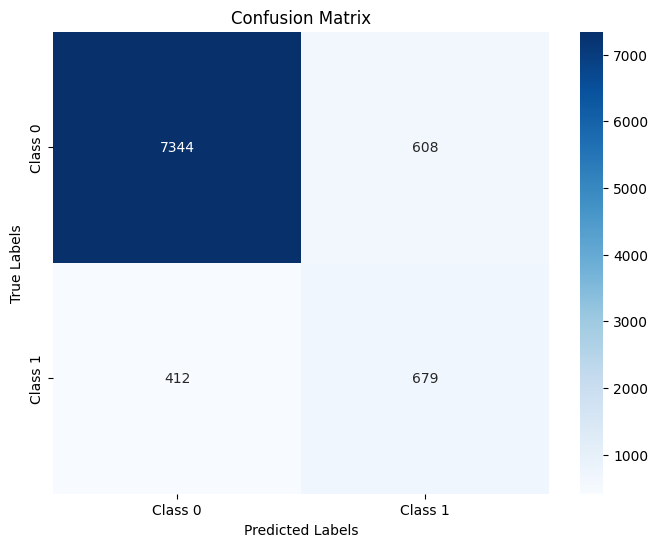

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate predictions with a custom threshold
threshold = 0.3  # Adjust this as needed
y_pred_nn_tuned = (y_pred_prob > threshold).astype(int)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_nn_tuned)

# Print the confusion matrix
print("\nConfusion Matrix:")
print(cm)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()